In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplolib inline

In [4]:
diamonds = sns.load_dataset("diamonds")
exercise= sns.load_dataset("exercise")
flights= sns.load_dataset("flights")
geyser= sns.load_dataset("geyser")
iris= sns.load_dataset("iris")
penguins= sns.load_dataset("penguins")
planets= sns.load_dataset("planets")
mpg= sns.load_dataset("mpg")
tips= sns.load_dataset("tips")
titanic= sns.load_dataset("titanic")

# barplot

**Jonathan Soma**

In [18]:
df = pd.DataFrame([
    { 'donations': 25, 'expenses': 30, 'month': 'April' },
    { 'donations': 5, 'expenses': 10, 'month': 'May' },
    { 'donations': 55, 'expenses': 20, 'month': 'June' }
])
df

,donations,expenses,month
0,25,30,April
1,5,10,May
2,55,20,June


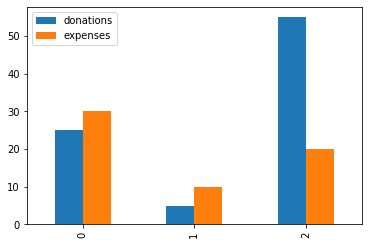

In [19]:
df.plot(kind="bar")
#default olarak indexi (0,1,2) alır x eksenine koyar. 

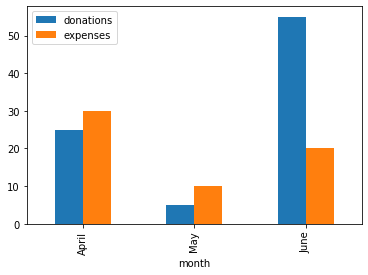

In [20]:
df.plot(kind="bar", x="month")#burda x eksenini kendimiz belirliyoruz

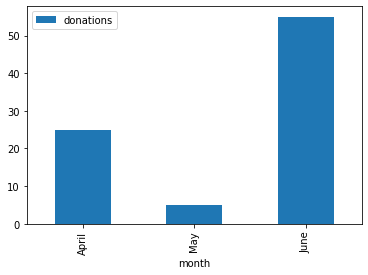

In [22]:
df.plot(kind="bar", x="month", y="donations")#y ekseni özelleştirilebilir. 

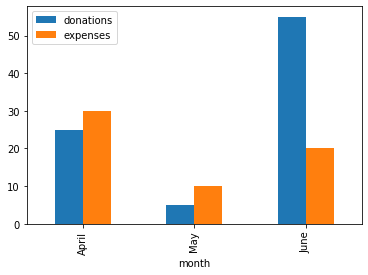

In [23]:
df.plot(kind="bar", x="month", y=["donations", "expenses"])

In [24]:
df.set_index("month")

,donations,expenses
month,,
April,25,30
May,5,10
June,55,20


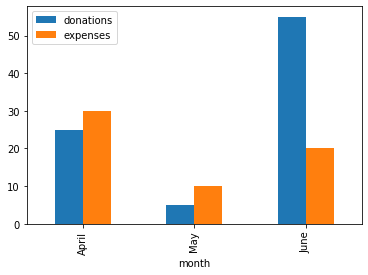

In [25]:
df.set_index("month").plot(kind="bar")

### animal example

In [57]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant','rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index)
df

,speed,lifespan
snail,0.1,2.0
pig,17.5,8.0
elephant,40.0,70.0
rabbit,48.0,1.5
giraffe,52.0,25.0
coyote,69.0,12.0
horse,88.0,28.0


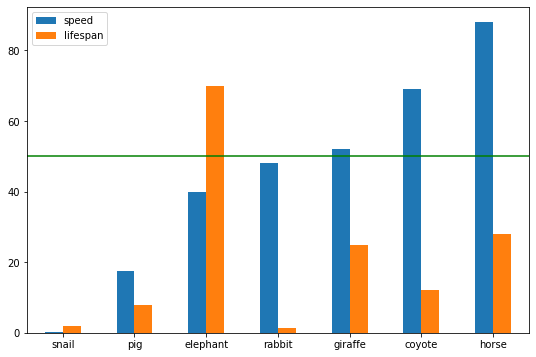

In [65]:
df.plot(kind = "bar", figsize = (9,6), rot=0) # rot : int, default None Rotation for ticks (xticks for vertical, yticks for horizontal plots).
plt.axhline(y=50, color="green", ls="-")

In [66]:
labels = ['Snail', 'Pig', 'Elephant','Rabbit', 'Giraffe', 'Coyote', 'Horse']

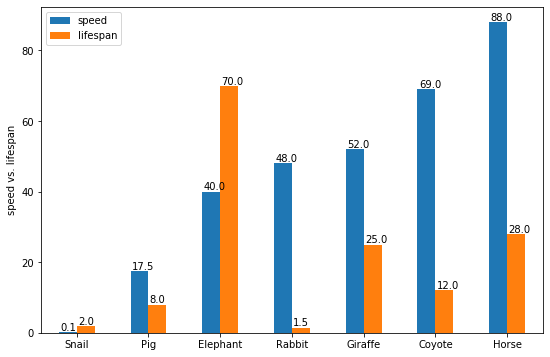

In [70]:
g = df.plot(kind = "bar", figsize = (9,6), rot = 0)
g.set_xticklabels(labels)
g.set_ylabel("speed vs. lifespan")
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.02, p.get_height()+0.5))

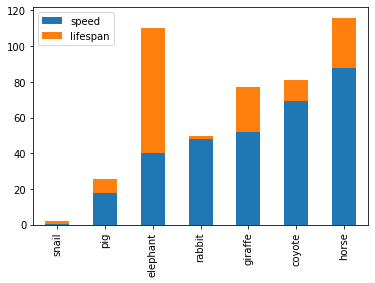

In [71]:
df.plot.bar(stacked=True)

## groupby method vis

In [26]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


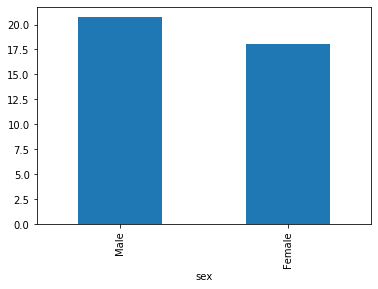

In [27]:
tips.groupby("sex")["total_bill"].mean().plot(kind="bar")
#tips.groupby("sex")["total_bill"].mean().plot.bar() # the same result

## value_counts() vis

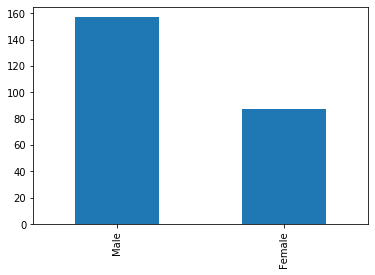

In [28]:
tips.sex.value_counts().plot(kind="bar")

In [10]:
raw_data = {
    "city": ["Tripoli", "Sydney", "Tripoli", "Rome", "Tripoli", "Rome", "Sydney","Sydney",  "Sydney"], 
    "rank": ["1st", "2nd","1st", "2nd","1st", "2nd","1st", "2nd","1st" ],
    "score1": [44,48,39,41,38,44,34,54,61], 
    "score2": [67,63,55,70,64,75,45,66,72]}
df = pd.DataFrame(raw_data,
                 index=pd.Index(["A", "B", "C", "D", "E", "F", "G", "H", "I"],name= "letter"),
                  columns=pd.Index(["city", "rank", "score1", "score2"], name="attributes"))
df

In [29]:
df = pd.DataFrame(raw_data,
                 index=pd.Index(["A", "B", "C", "D", "E", "F", "G", "H", "I"],name= "letter"),
                  columns=pd.Index(["city", "rank", "score1", "score2"], name="attributes"))
df

attributes,city,rank,score1,score2
letter,,,,
A,Tripoli,1st,44,67
B,Sydney,2nd,48,63
C,Tripoli,1st,39,55
D,Rome,2nd,41,70
E,Tripoli,1st,38,64
F,Rome,2nd,44,75
G,Sydney,1st,34,45
H,Sydney,2nd,54,66
I,Sydney,1st,61,72


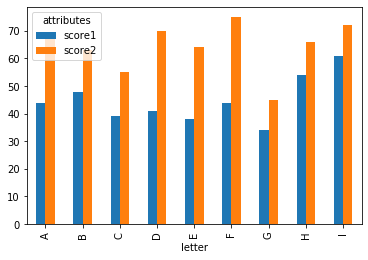

In [30]:
df.plot(kind="bar")

# Summarizing and reshaping data

## Each row is a summary line

In [31]:
df = pd.DataFrame([
    { 'borough': 'Brooklyn', 'breed': 'medium', 'count': 5 },
    { 'borough': 'Brooklyn', 'breed': 'small', 'count': 15 },
    { 'borough': 'Brooklyn', 'breed': 'big', 'count': 52 },
    { 'borough': 'Manhattan', 'breed': 'medium', 'count': 25 },
    { 'borough': 'Manhattan', 'breed': 'small', 'count': 9 },
    { 'borough': 'Manhattan', 'breed': 'big', 'count': 4 },
    { 'borough': 'Queens', 'breed': 'medium', 'count': 8 },
    { 'borough': 'Queens', 'breed': 'big', 'count': 15 },
    { 'borough': 'Queens', 'breed': 'small', 'count': 35 },
])
# Each row is a SUMMARY!!!!!
df

,borough,breed,count
0,Brooklyn,medium,5
1,Brooklyn,small,15
2,Brooklyn,big,52
3,Manhattan,medium,25
4,Manhattan,small,9
5,Manhattan,big,4
6,Queens,medium,8
7,Queens,big,15
8,Queens,small,35


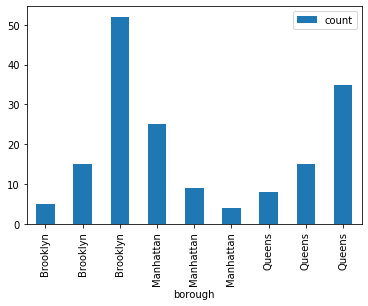

In [32]:
df.plot(kind="bar", x= "borough")#bunlar groupby chart vermez

## pivot_table plot

In [35]:
df.pivot_table(index="borough", columns="breed")

count             
breed       big medium small
borough                     
Brooklyn     52      5    15
Manhattan     4     25     9
Queens       15      8    35

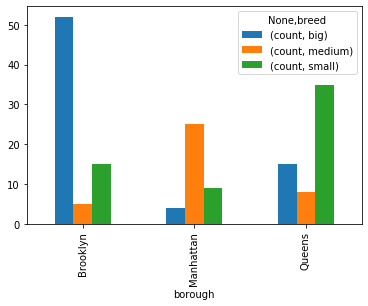

In [36]:
df.pivot_table(index="borough", columns="breed").plot(kind="bar")

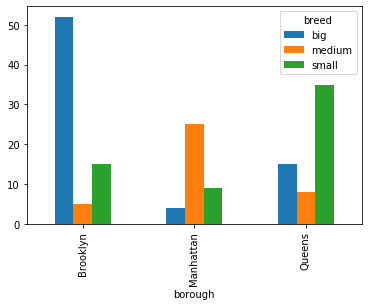

In [37]:
df.pivot_table(index="borough", columns="breed").plot(kind="bar", y="count")

## Each row is a data point

In [38]:
df = pd.DataFrame([
    { 'breed': 'big', 'borough': 'Queens' },
    { 'breed': 'big', 'borough': 'Brooklyn' },
    { 'breed': 'small', 'borough': 'Brooklyn' },
    { 'breed': 'big', 'borough': 'Brooklyn' },
    { 'breed': 'big', 'borough': 'Brooklyn' },
    { 'breed': 'small', 'borough': 'Bronx' },
    { 'breed': 'big', 'borough': 'Bronx' },
    { 'breed': 'medium', 'borough': 'Bronx' },
    { 'breed': 'medium', 'borough': 'Brooklyn' },
    { 'breed': 'big', 'borough': 'Manhattan' },
    { 'breed': 'small', 'borough': 'Manhattan' },
    { 'breed': 'small', 'borough': 'Manhattan' },
    { 'breed': 'small', 'borough': 'Manhattan' },
    { 'breed': 'small', 'borough': 'Manhattan' },
])
df

,breed,borough
0,big,Queens
1,big,Brooklyn
2,small,Brooklyn
3,big,Brooklyn
4,big,Brooklyn
5,small,Bronx
6,big,Bronx
7,medium,Bronx
8,medium,Brooklyn
9,big,Manhattan


In [39]:
df.groupby("borough").breed.value_counts()

borough    breed 
Bronx      big       1
           medium    1
           small     1
Brooklyn   big       3
           medium    1
           small     1
Manhattan  small     4
           big       1
Queens     big       1
Name: breed, dtype: int64

## ya grupby ya da unstack ile row summary haline getir

In [40]:
newdf= df.groupby("borough").breed.value_counts().reset_index(name="counts")#each row summary oldu

In [41]:
newdf.pivot_table(index="borough", columns="breed")

counts             
breed        big medium small
borough                      
Bronx        1.0    1.0   1.0
Brooklyn     3.0    1.0   1.0
Manhattan    1.0    NaN   4.0
Queens       1.0    NaN   NaN

In [42]:
df.groupby("borough").breed.value_counts().unstack()

breed,big,medium,small
borough,,,
Bronx,1.0,1.0,1.0
Brooklyn,3.0,1.0,1.0
Manhattan,1.0,NaN,4.0
Queens,1.0,NaN,NaN


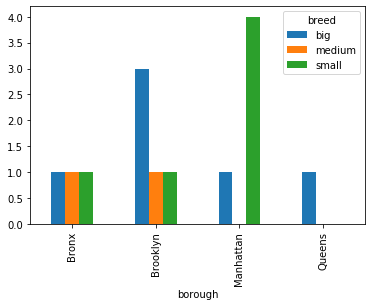

In [43]:
df.groupby("borough").breed.value_counts().unstack().plot(kind="bar")

## easier way

In [44]:
df

,breed,borough
0,big,Queens
1,big,Brooklyn
2,small,Brooklyn
3,big,Brooklyn
4,big,Brooklyn
5,small,Bronx
6,big,Bronx
7,medium,Bronx
8,medium,Brooklyn
9,big,Manhattan


In [45]:
pd.crosstab(df.borough, df.breed)

breed,big,medium,small
borough,,,
Bronx,1,1,1
Brooklyn,3,1,1
Manhattan,1,0,4
Queens,1,0,0


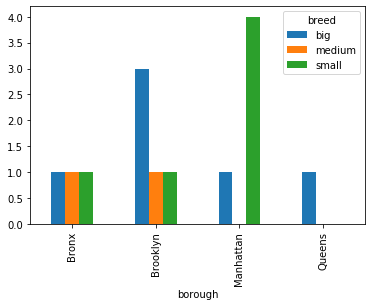

In [46]:
pd.crosstab(df.borough, df.breed).plot(kind="bar")

## histogram

In [48]:
raw_data = {
    "city": ["Tripoli", "Sydney", "Tripoli", "Rome", "Tripoli", "Rome", "Sydney","Sydney",  "Sydney"], 
    "rank": ["1st", "2nd","1st", "2nd","1st", "2nd","1st", "2nd","1st" ],
    "score1": [44,48,39,41,38,44,34,54,61], 
    "score2": [67,63,55,70,64,75,45,66,72]}
df = pd.DataFrame(raw_data,
                 index=pd.Index(["A", "B", "C", "D", "E", "F", "G", "H", "I"],name= "letter"),
                  columns=pd.Index(["city", "rank", "score1", "score2"], name="attributes"))
df

attributes,city,rank,score1,score2
letter,,,,
A,Tripoli,1st,44,67
B,Sydney,2nd,48,63
C,Tripoli,1st,39,55
D,Rome,2nd,41,70
E,Tripoli,1st,38,64
F,Rome,2nd,44,75
G,Sydney,1st,34,45
H,Sydney,2nd,54,66
I,Sydney,1st,61,72


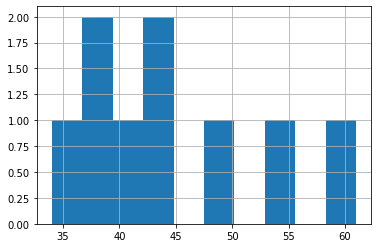

In [50]:
df.score1.hist()

## area plot

In [51]:
df = pd.DataFrame({'sales': [3, 2, 3, 9, 10, 6], 'signups': [5, 5, 6, 12, 14, 13],
                   'visits': [20, 42, 28, 62, 81, 50]},
                  index=pd.date_range(start='2018/01/01', end='2018/07/01',
                                      freq='M'))
df

,sales,signups,visits
2018-01-31,3,5,20
2018-02-28,2,5,42
2018-03-31,3,6,28
2018-04-30,9,12,62
2018-05-31,10,14,81
2018-06-30,6,13,50


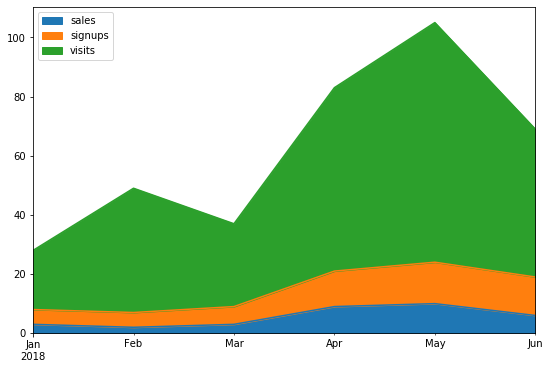

In [54]:
df.plot.area(figsize = (9,6))#1.YÖNTEM

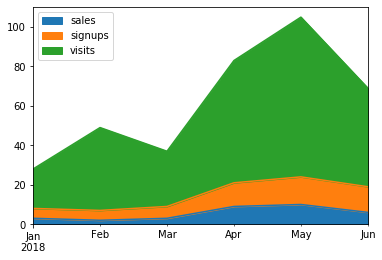

In [55]:
df.plot(kind = "area")#2.YÖNTEM

## lineplot

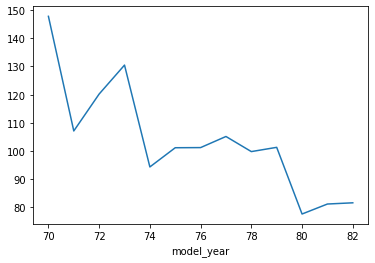

In [73]:
mpg.groupby("model_year").horsepower.mean().plot()

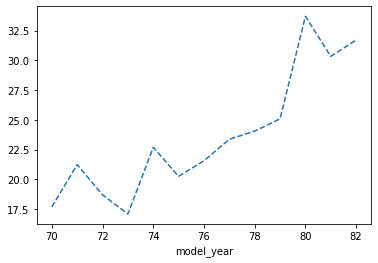

In [74]:
mpg.groupby("model_year").mpg.mean().plot(ls="--")

In [75]:
# pip install pandas-datareader

In [76]:
from pandas_datareader import data
from datetime import datetime

In [77]:
start = datetime(2020, 1, 1)
end = datetime(2020, 8, 30)

In [78]:
f = data.DataReader(name="AAPL", data_source="av-daily", start=start, end=end, api_key = "CI1UUA44YI12JAB3")

In [79]:
# https://www.alphavantage.co/support/#api

In [80]:
f.head()

,open,high,low,close,volume
2020-01-02,296.24,300.60,295.19,300.35,33911864
2020-01-03,297.15,300.58,296.50,297.43,36633878
2020-01-06,293.79,299.96,292.75,299.80,29644644
2020-01-07,299.84,300.90,297.48,298.39,27877655
2020-01-08,297.16,304.44,297.16,303.19,33090946


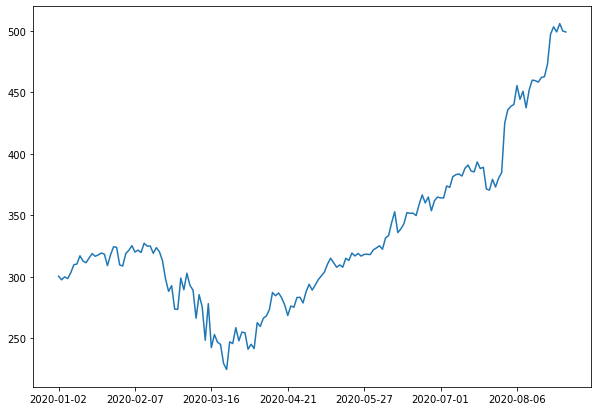

In [81]:
f.close.plot(figsize=(10,7))

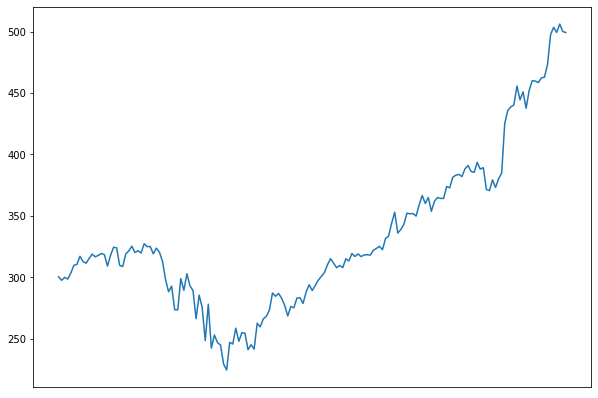

In [82]:
import matplotlib.dates as mdates
import numpy as np
fig, ax = plt.subplots(figsize=(10,7))
#ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.set_xticklabels(f.index, rotation=45)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.plot(f.close.index, f.close);

## moving avarage

In [83]:
seven =f.close.rolling(window=7).mean()#7 günlük hareketli ortalama-o gün ve önceki 6 günün ortalaması

In [84]:
seven.head(10)

2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
2020-01-09           NaN
2020-01-10    302.731429
2020-01-13    305.104286
2020-01-14    307.282857
2020-01-15    308.931429
Name: close, dtype: float64

In [85]:
ten =f.close.rolling(window=10).mean()

In [86]:
twenty =f.close.rolling(window=20).mean()

In [87]:
thirty =f.close.rolling(window=30).mean()

In [88]:
ten.head(15)

2020-01-02        NaN
2020-01-03        NaN
2020-01-06        NaN
2020-01-07        NaN
2020-01-08        NaN
2020-01-09        NaN
2020-01-10        NaN
2020-01-13        NaN
2020-01-14        NaN
2020-01-15    306.010
2020-01-16    307.499
2020-01-17    309.629
2020-01-21    311.306
2020-01-22    313.237
2020-01-23    314.841
Name: close, dtype: float64

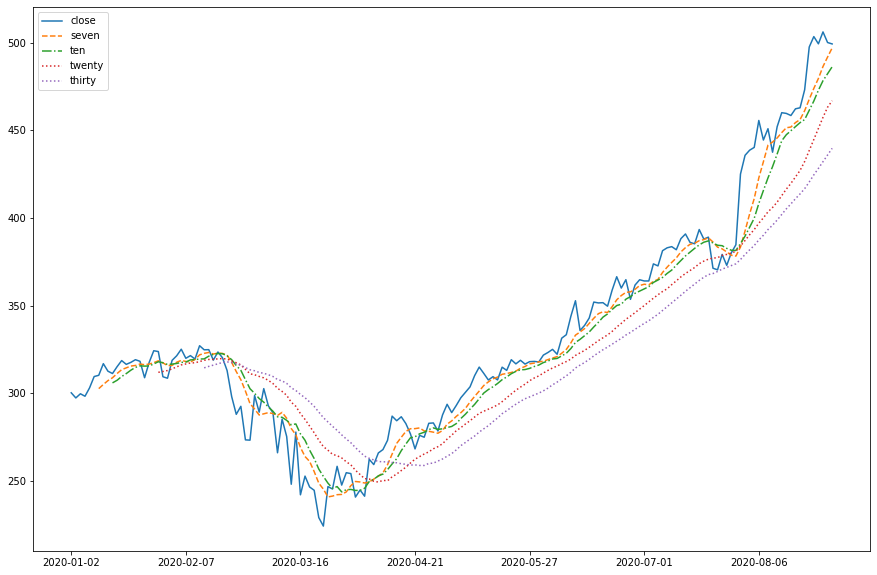

In [89]:
plt.figure(figsize=(15,10))
f.close.plot(ls="-")
seven.plot(ls="--")
ten.plot(ls="-.")
twenty.plot(ls=":")
thirty.plot(ls="dotted")
plt.legend(["close", "seven", "ten", "twenty", "thirty"])

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


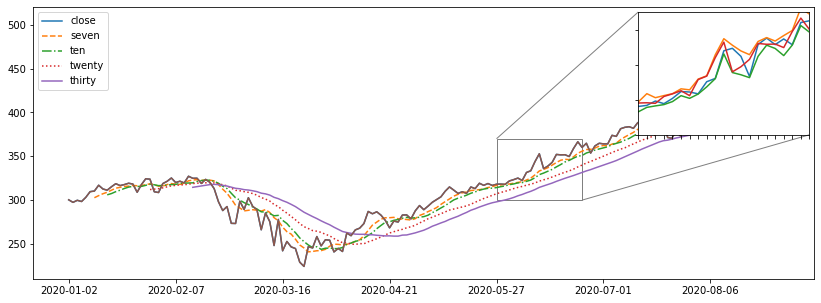

In [90]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig=plt.figure(figsize=(14,5))
f.close.plot()
seven.plot(ls='--')
ten.plot(ls='-.')
twenty.plot(ls=':')
thirty.plot()
plt.legend(['close', 'seven', 'ten', 'twenty', 'thirty'])
ax = plt.axes()
ax.plot(f.close)
x1 = f.close.index[100]
x2 = f.close.index[120]
y1 = 300
y2 = 370
# Make the zoom-in plot:
axins = zoomed_inset_axes(ax, 2, loc=1) # zoom = 2
axins.plot(f)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.show()

## scatter plot

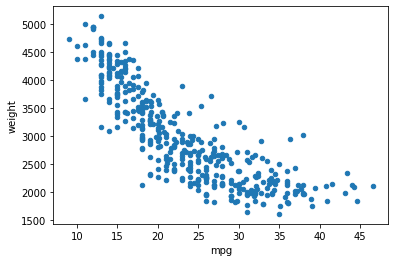

In [91]:
mpg.plot.scatter("mpg", "weight")

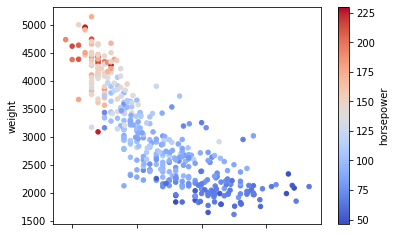

In [92]:
mpg.plot.scatter(x = "mpg", y = "weight", c = "horsepower", cmap="coolwarm")

## hexagonal bin plot

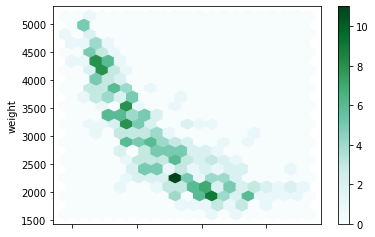

In [93]:
mpg.plot.hexbin("mpg", "weight", gridsize=20)

## box plot

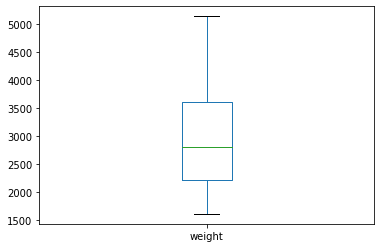

In [94]:
mpg.weight.plot.box()

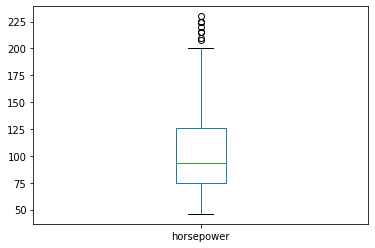

In [95]:
mpg.horsepower.plot.box()

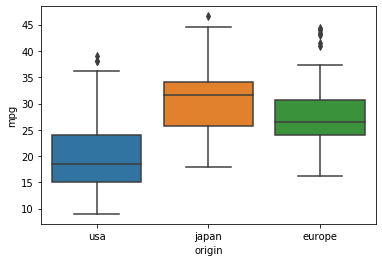

In [96]:
sns.boxplot(x="origin",y="mpg",data=mpg)#2'inci yöntem

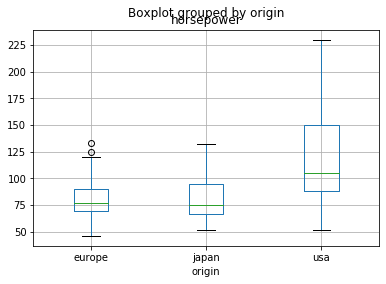

In [97]:
import warnings
warnings.filterwarnings("ignore")
mpg.boxplot(column = "horsepower", by="origin")#3ncü yöntem 

## kde plot

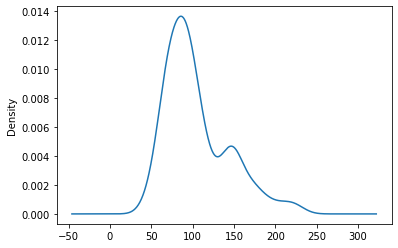

In [98]:
mpg.horsepower.plot.kde()